In [1]:
from src.preamble import*

# 지도 학습 알고리즘


## K- 최근접 이웃
### K - 최근접 이웃 분류

/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


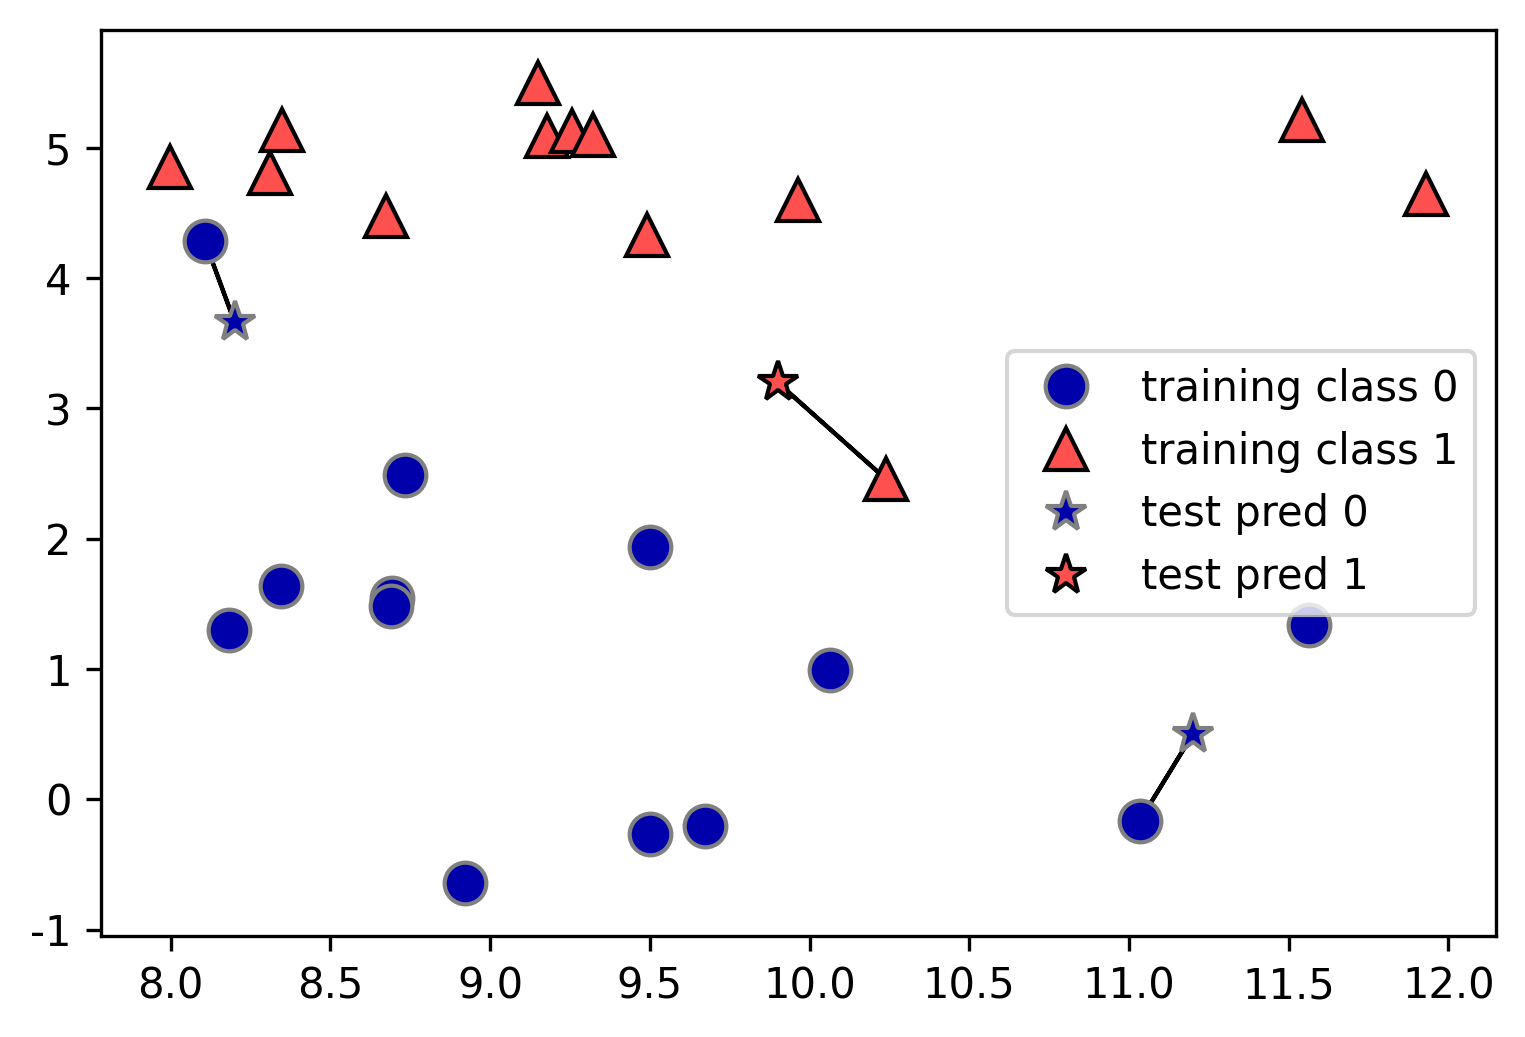

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


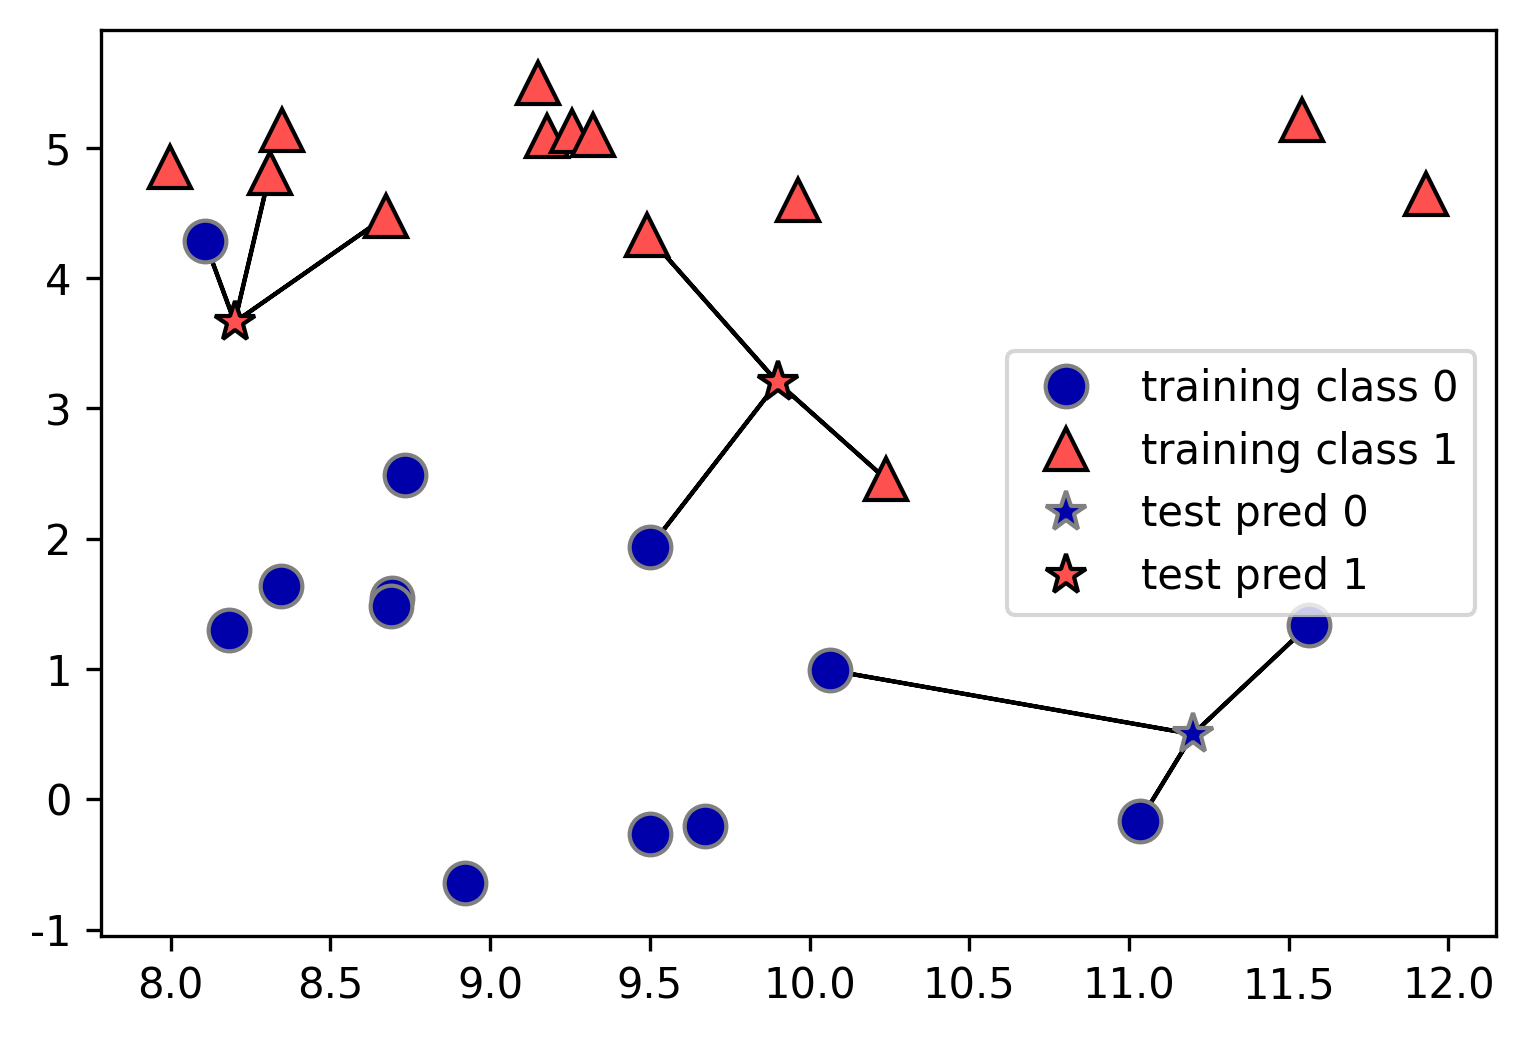

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [31]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

print(X.shape)
print(y.shape)

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26, 2)
(26,)
(19, 2)
(7, 2)
(19,)
(7,)


/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [33]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = clf.predict(X_test)
print("테스트 세트 예측: ", y_pred)
print("테스트 세트 예측: ", y_test)

테스트 세트 예측:  [1 0 1 0 1 0 0]
테스트 세트 예측:  [1 0 1 0 1 1 0]


In [11]:
print('테스트 정확도: {:.2f}' .format(clf.score(X_test, y_test)))

테스트 정확도: 0.86


## KNeighborClassifier 분석 

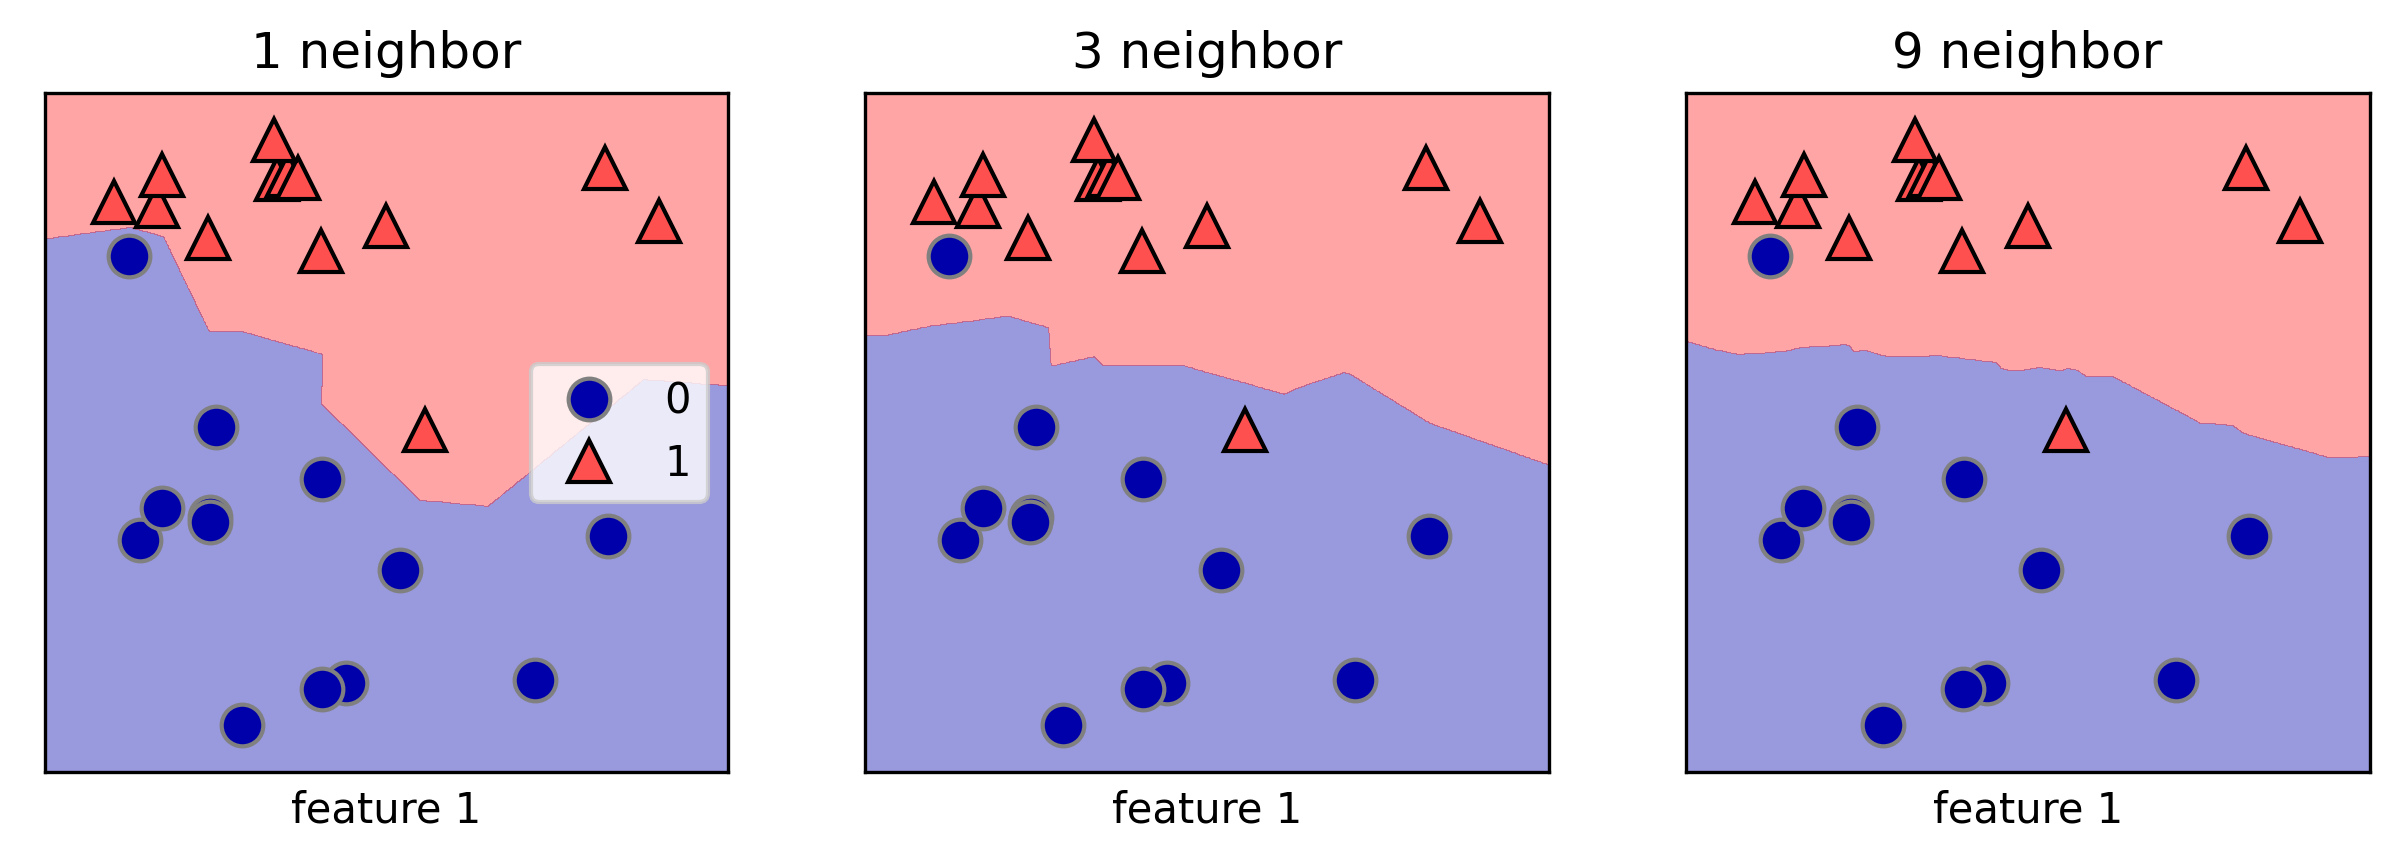

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    #fig 메소드는 self 오브젝트를 리턴한다.
    #그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill= True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[: ,1],y , ax = ax)
    
    ax.set_title("{} neighbor". format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_xlabel("feature 1")
axes[0].legend(loc = 'best')

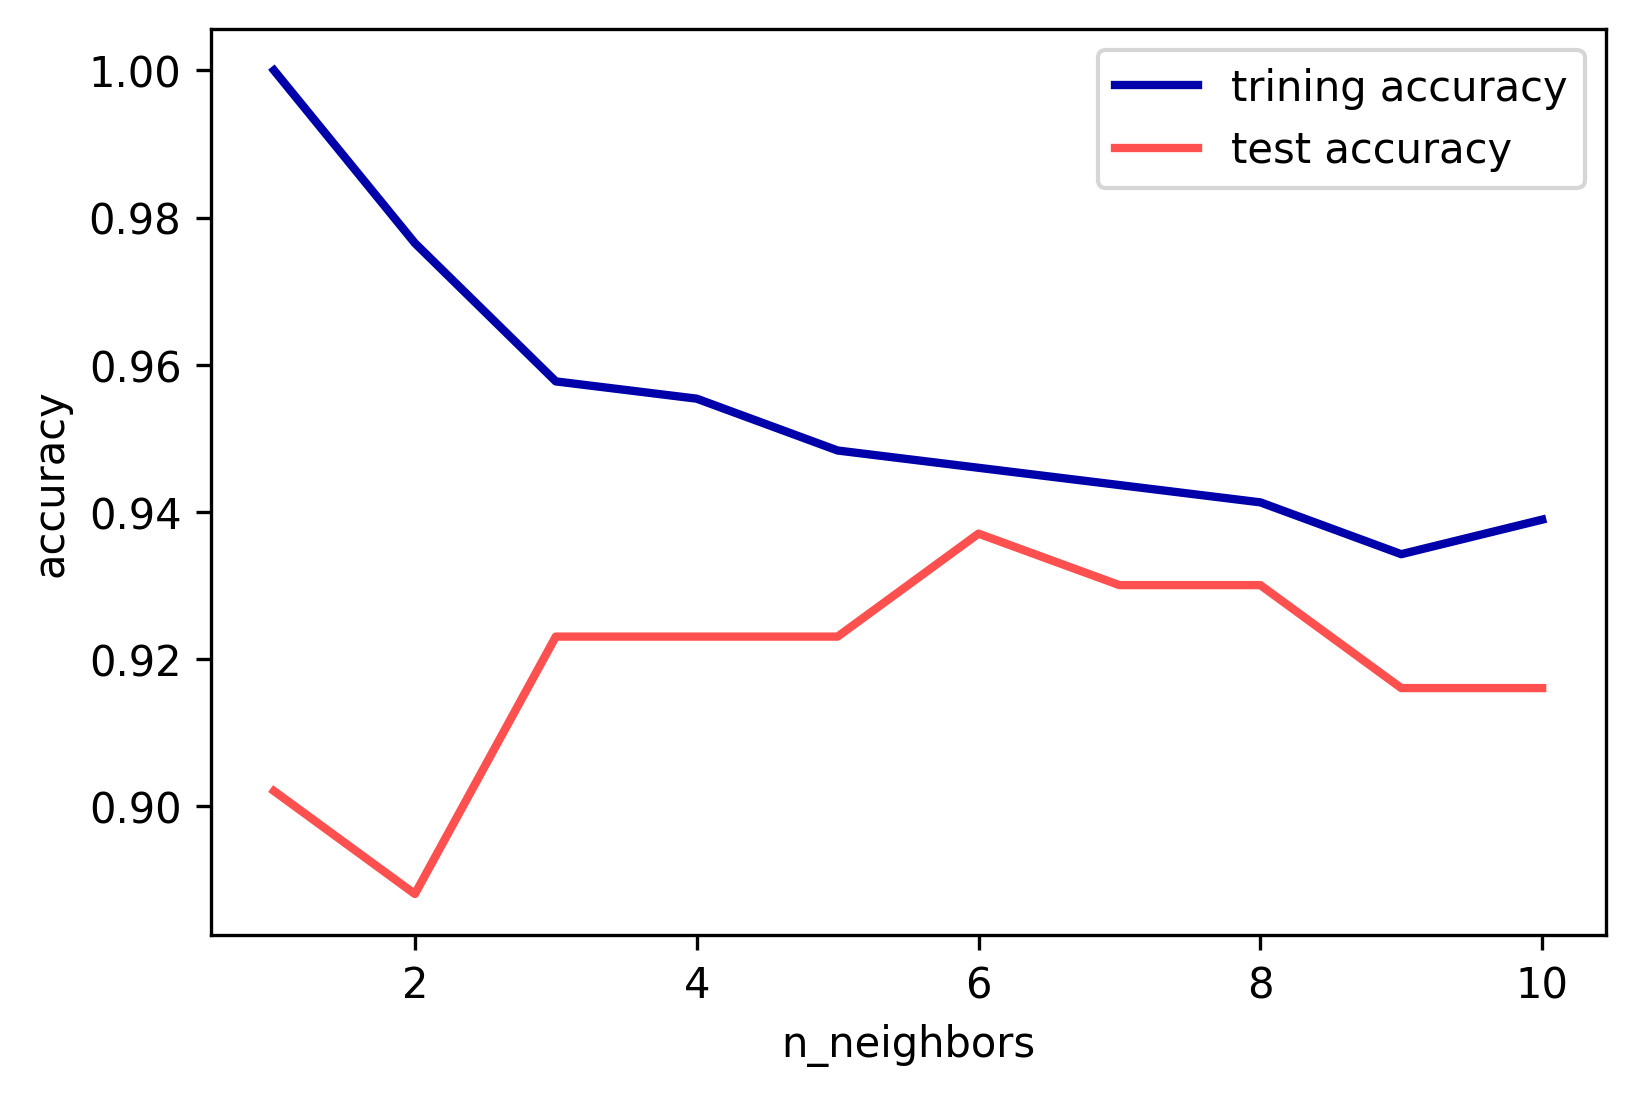

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test , y_train, y_test = train_test_split(
    cancer.data, cancer .target, stratify = cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []

#1에서 10 까지 n_neighbors 를 적용
neighbors_setting = range(1, 11)
    
for n_neighbors in neighbors_setting:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train, y_train)
    
    #훈련세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label="trining accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()


## K - Neighbors Regression

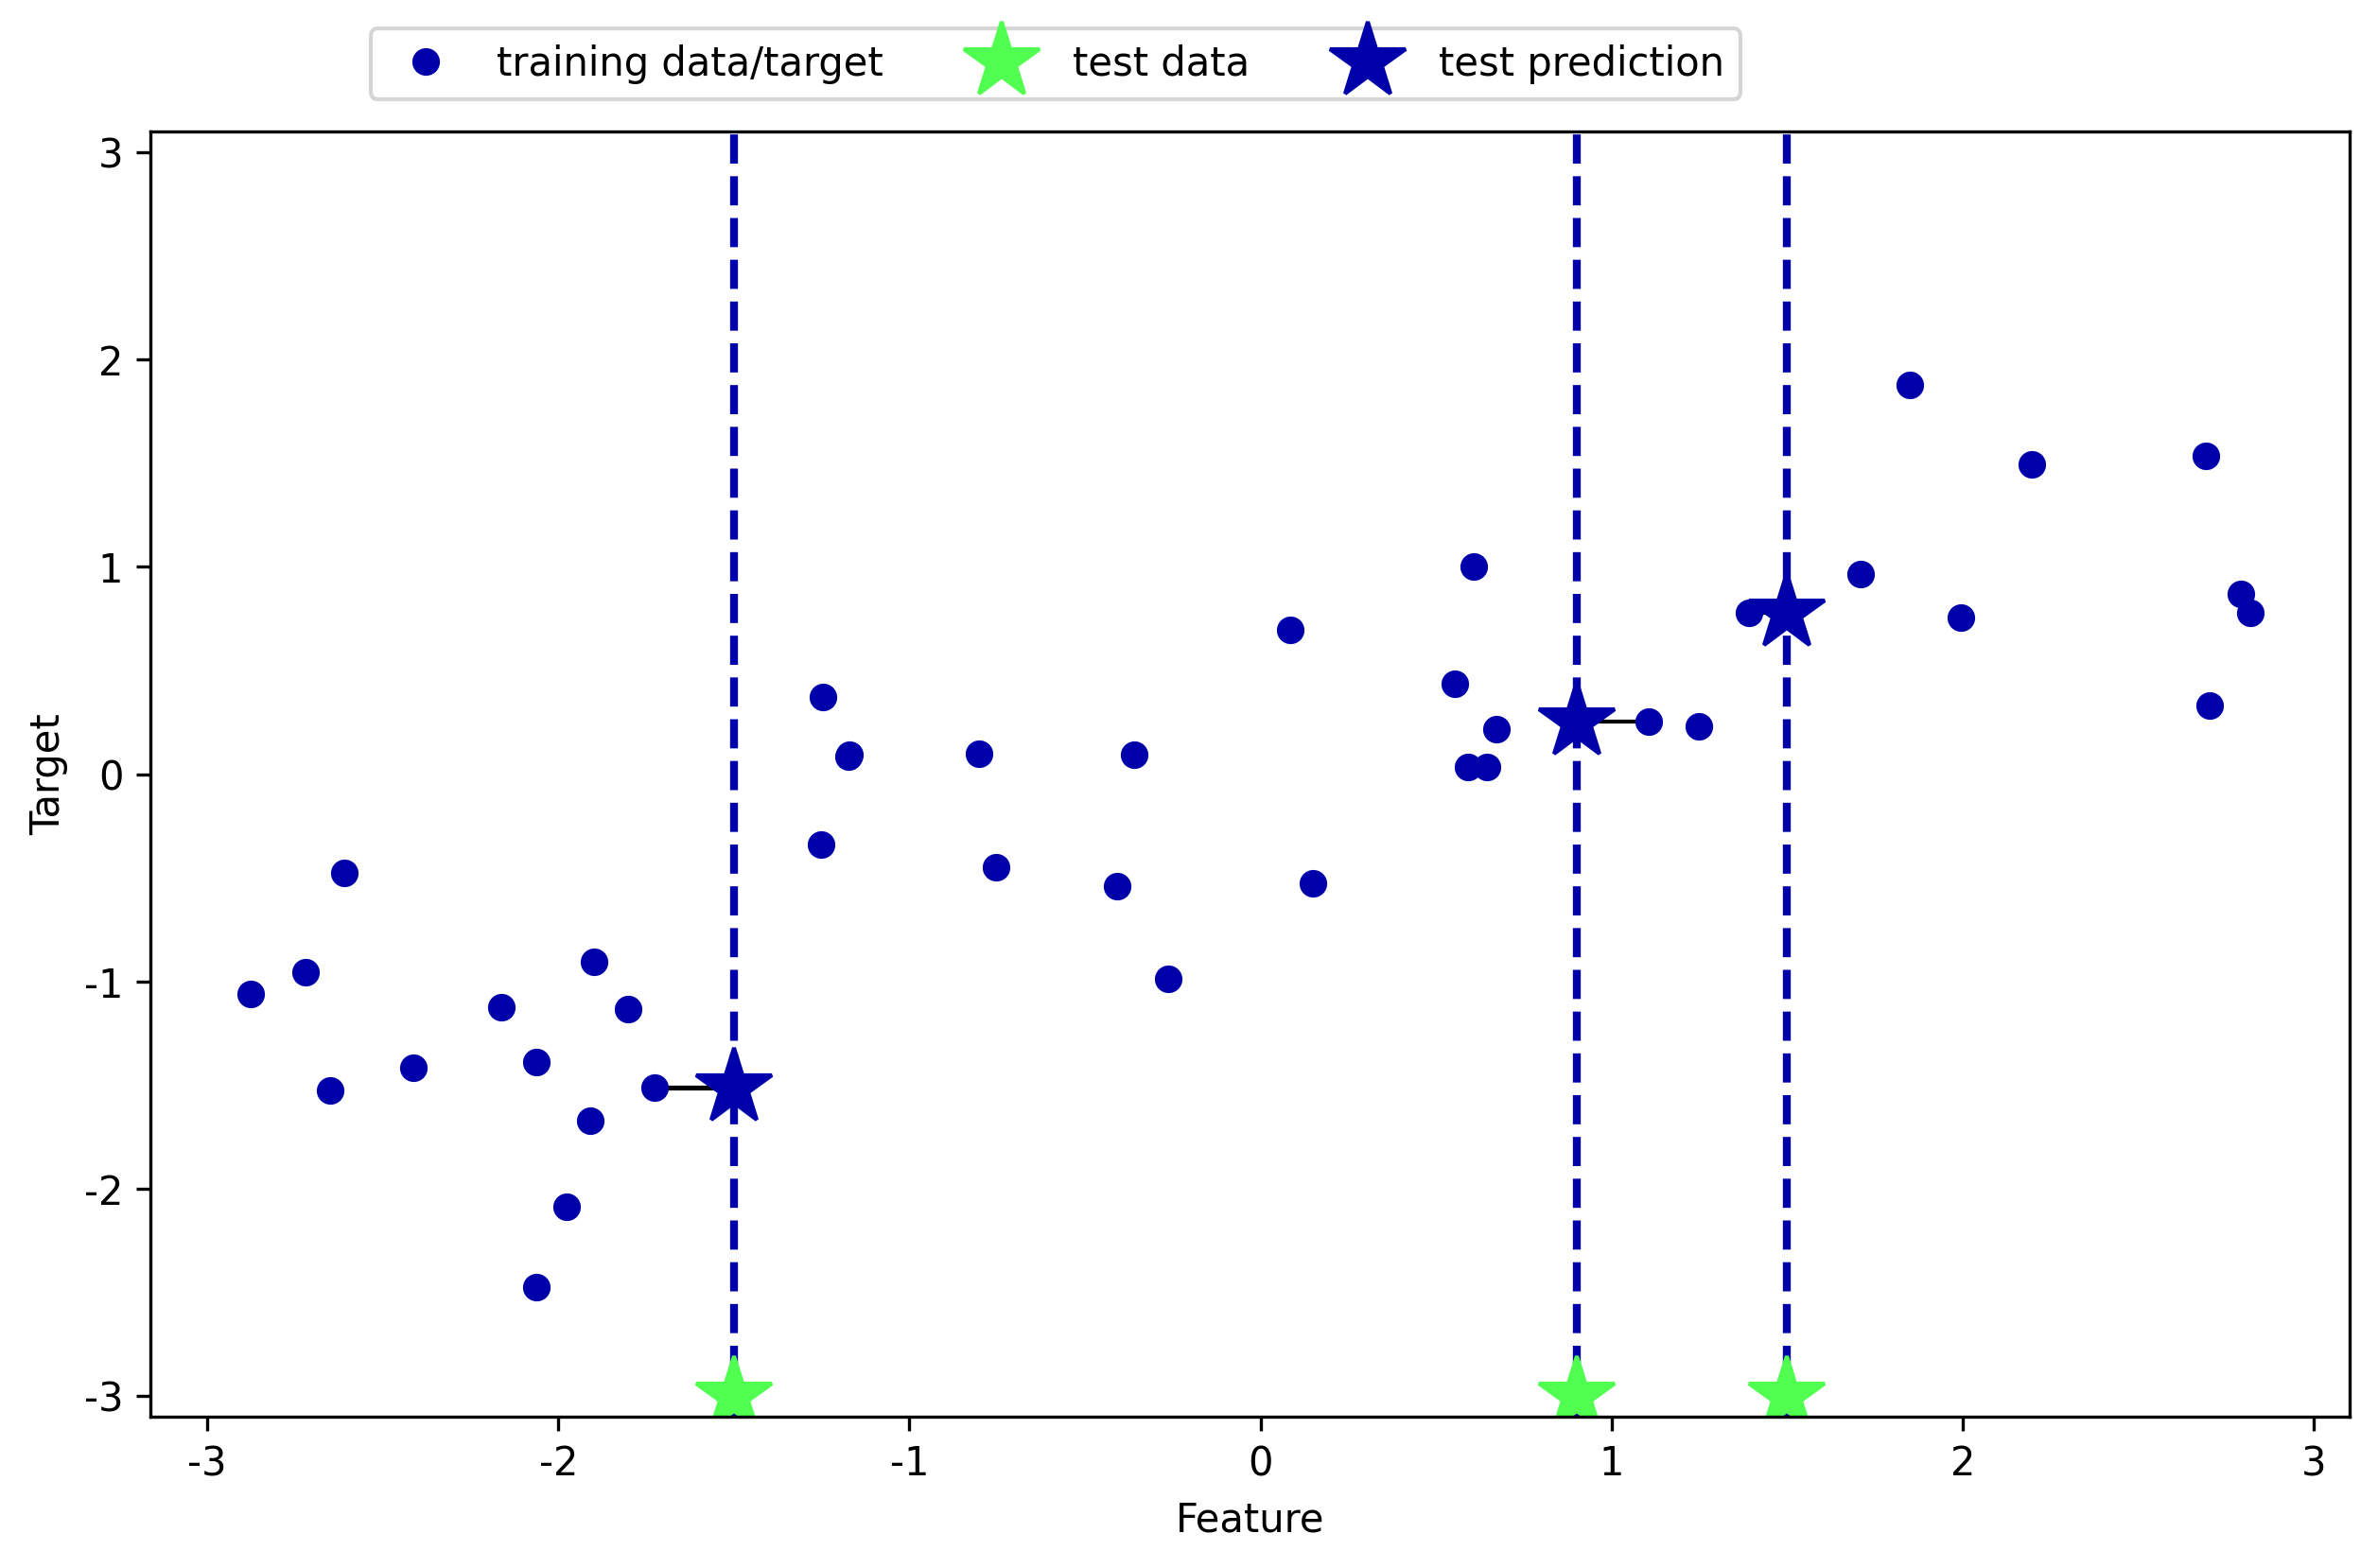

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

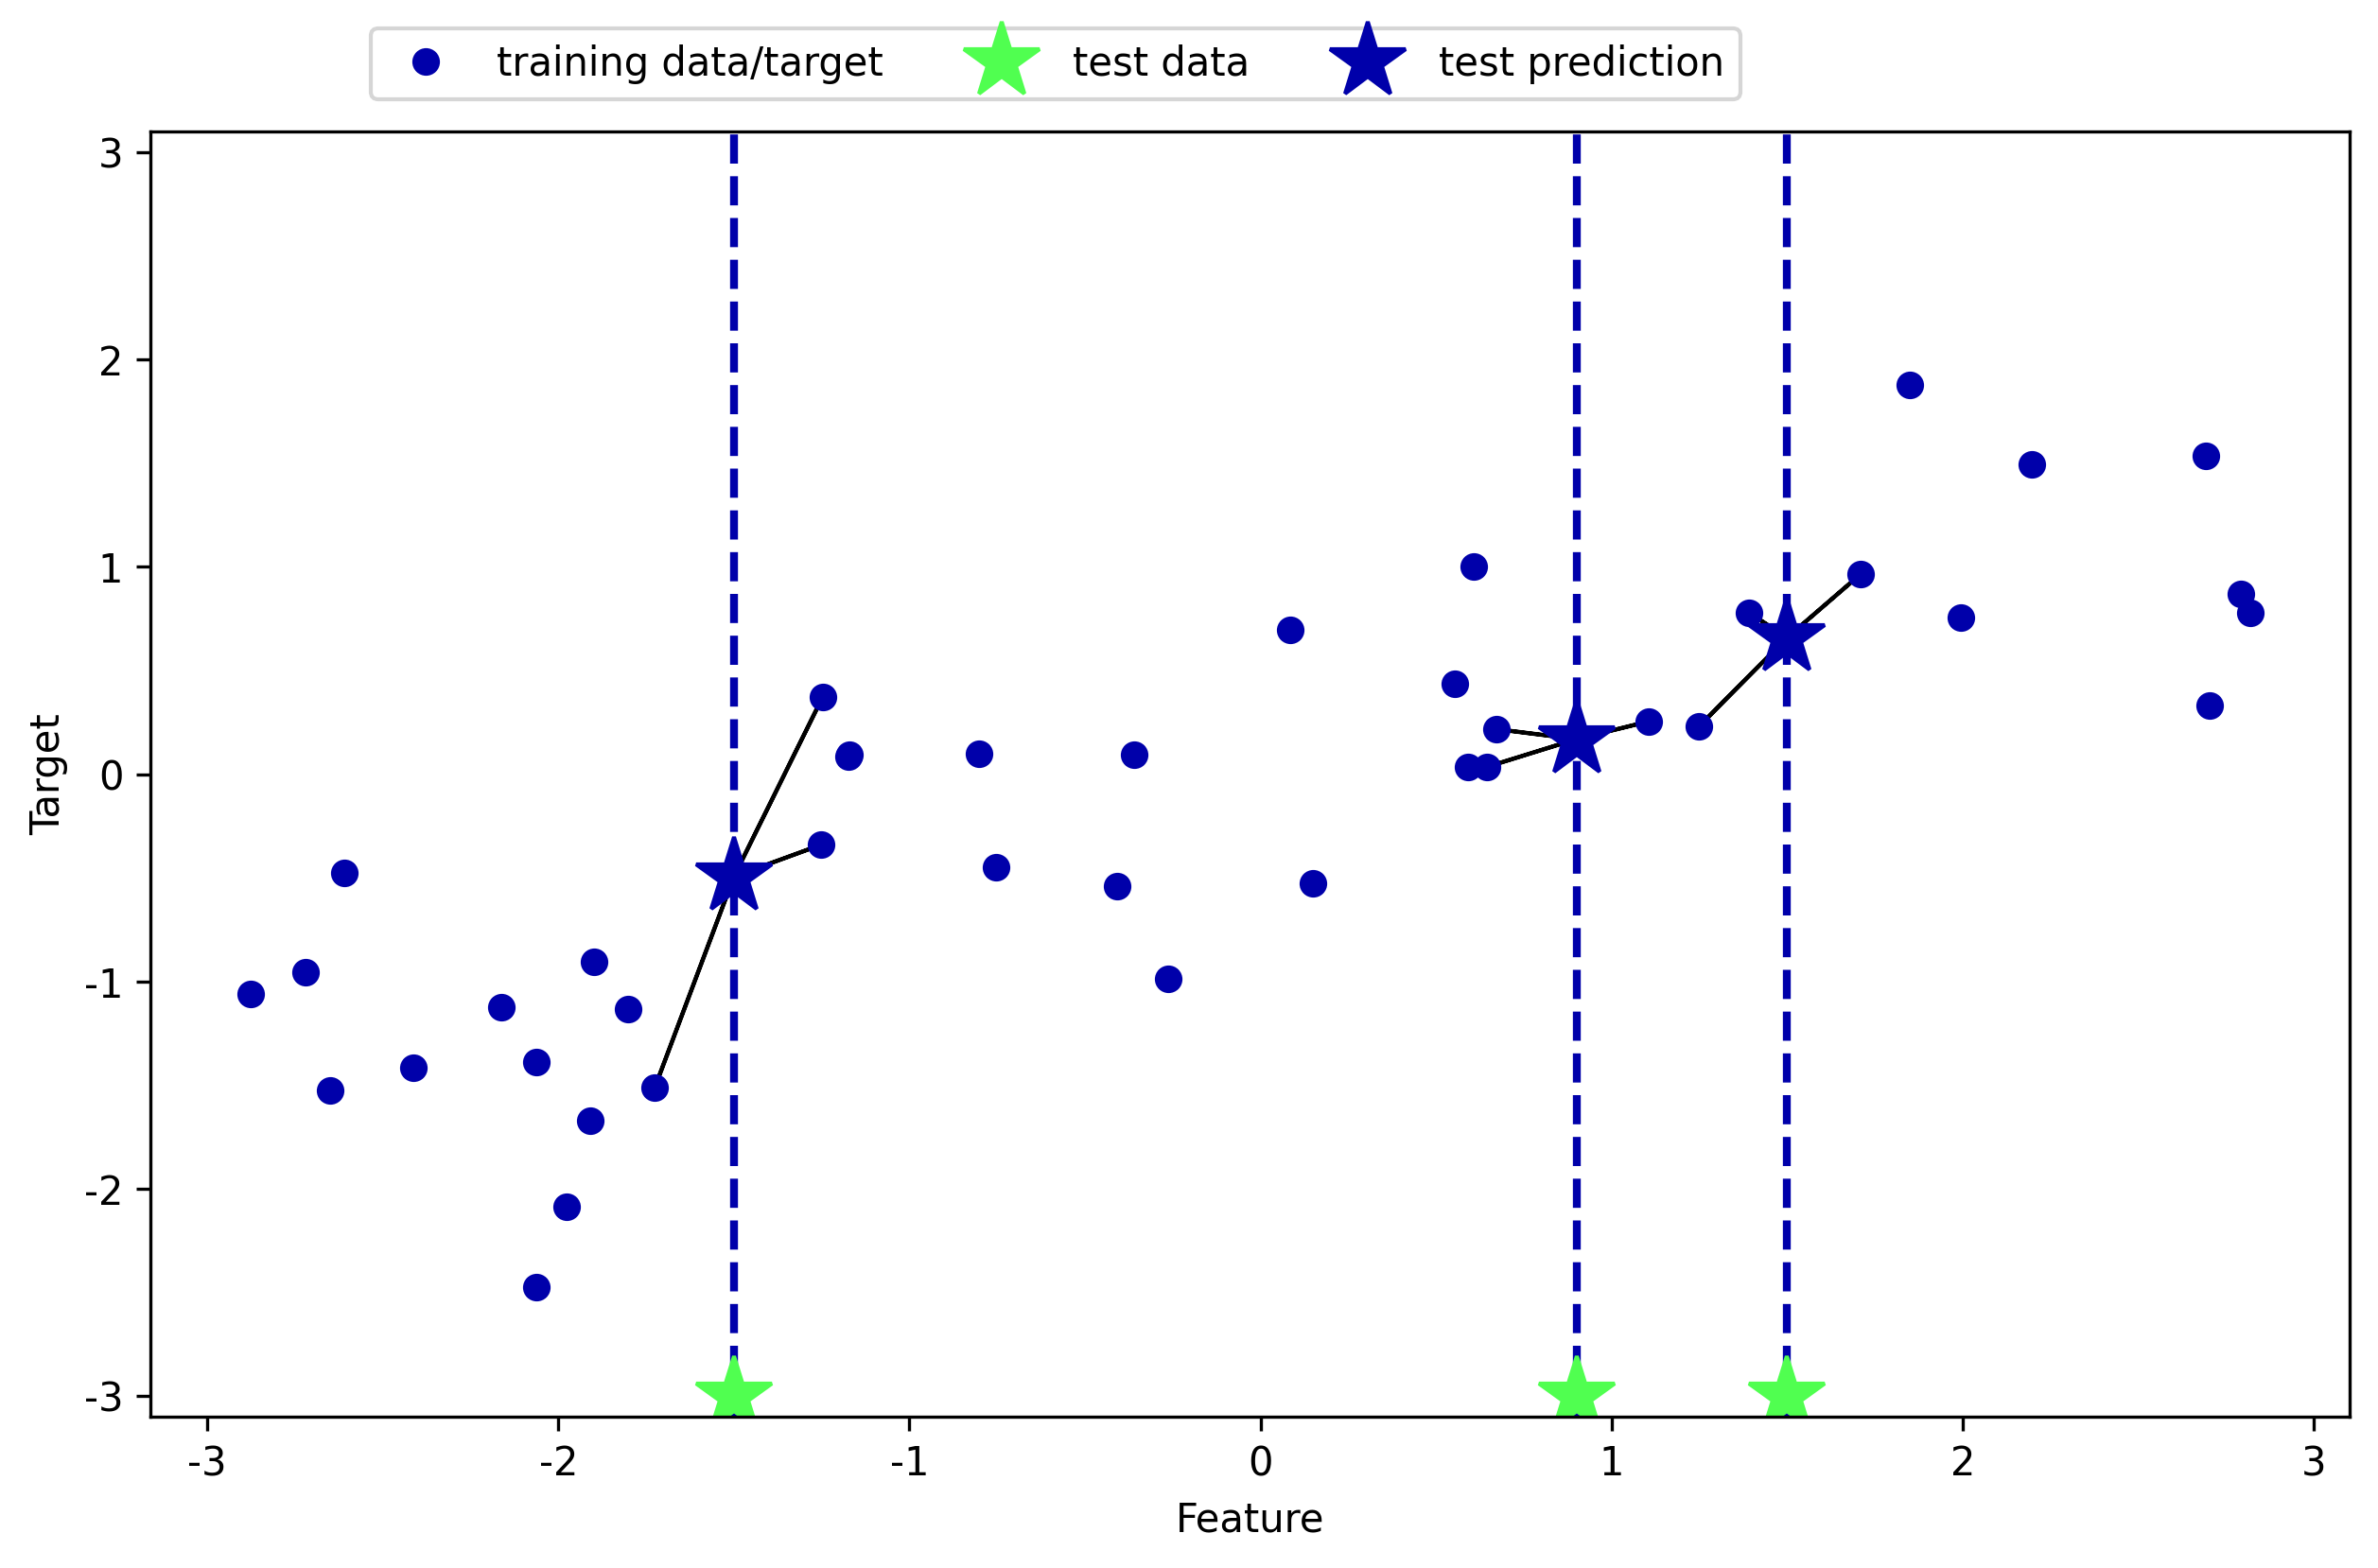

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

#wave 데이터 셋을 훈련 세트와 테스트 세트로 나눈다
X_train, X_test , y_train, y_test = train_test_split(X, y, random_state = 0)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

#이웃을 수를 3으로 하여 모델과 객체를 만든다
reg = KNeighborsRegressor(n_neighbors = 3)

#훈연 데이터와 타깃을 사용하여 모델을 학습시킨다
reg.fit(X_train, y_train)

(40, 1)
(30, 1)
(10, 1)


KNeighborsRegressor(n_neighbors=3)

In [24]:
print('테스트 세트 예측: \n', reg.predict(X_test))
print('테스트 세트 R^2: {:.2f}' .format(reg.score(X_test, y_test)))

테스트 세트 예측: 
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]
테스트 세트 R^2: 0.83


## KNeghborRegression 분석

<ipython-input-28-34169230c60e>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(X_train, y_train, '^', C= mglearn.cm2(0), markersize = 8)
<ipython-input-28-34169230c60e>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(X_test, y_test, 'v', C= mglearn.cm2(1), markersize = 8)
<ipython-input-28-34169230c60e>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(X_train, y_train, '^', C= mglearn.cm2(0), markersize = 8)
<ipython-input-28-34169230c60e>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(X_test, y_test, 'v', C= mglearn.cm2(1), markersize = 8)
<ipython-input-28-34169230c60e>:13: MatplotlibDeprec

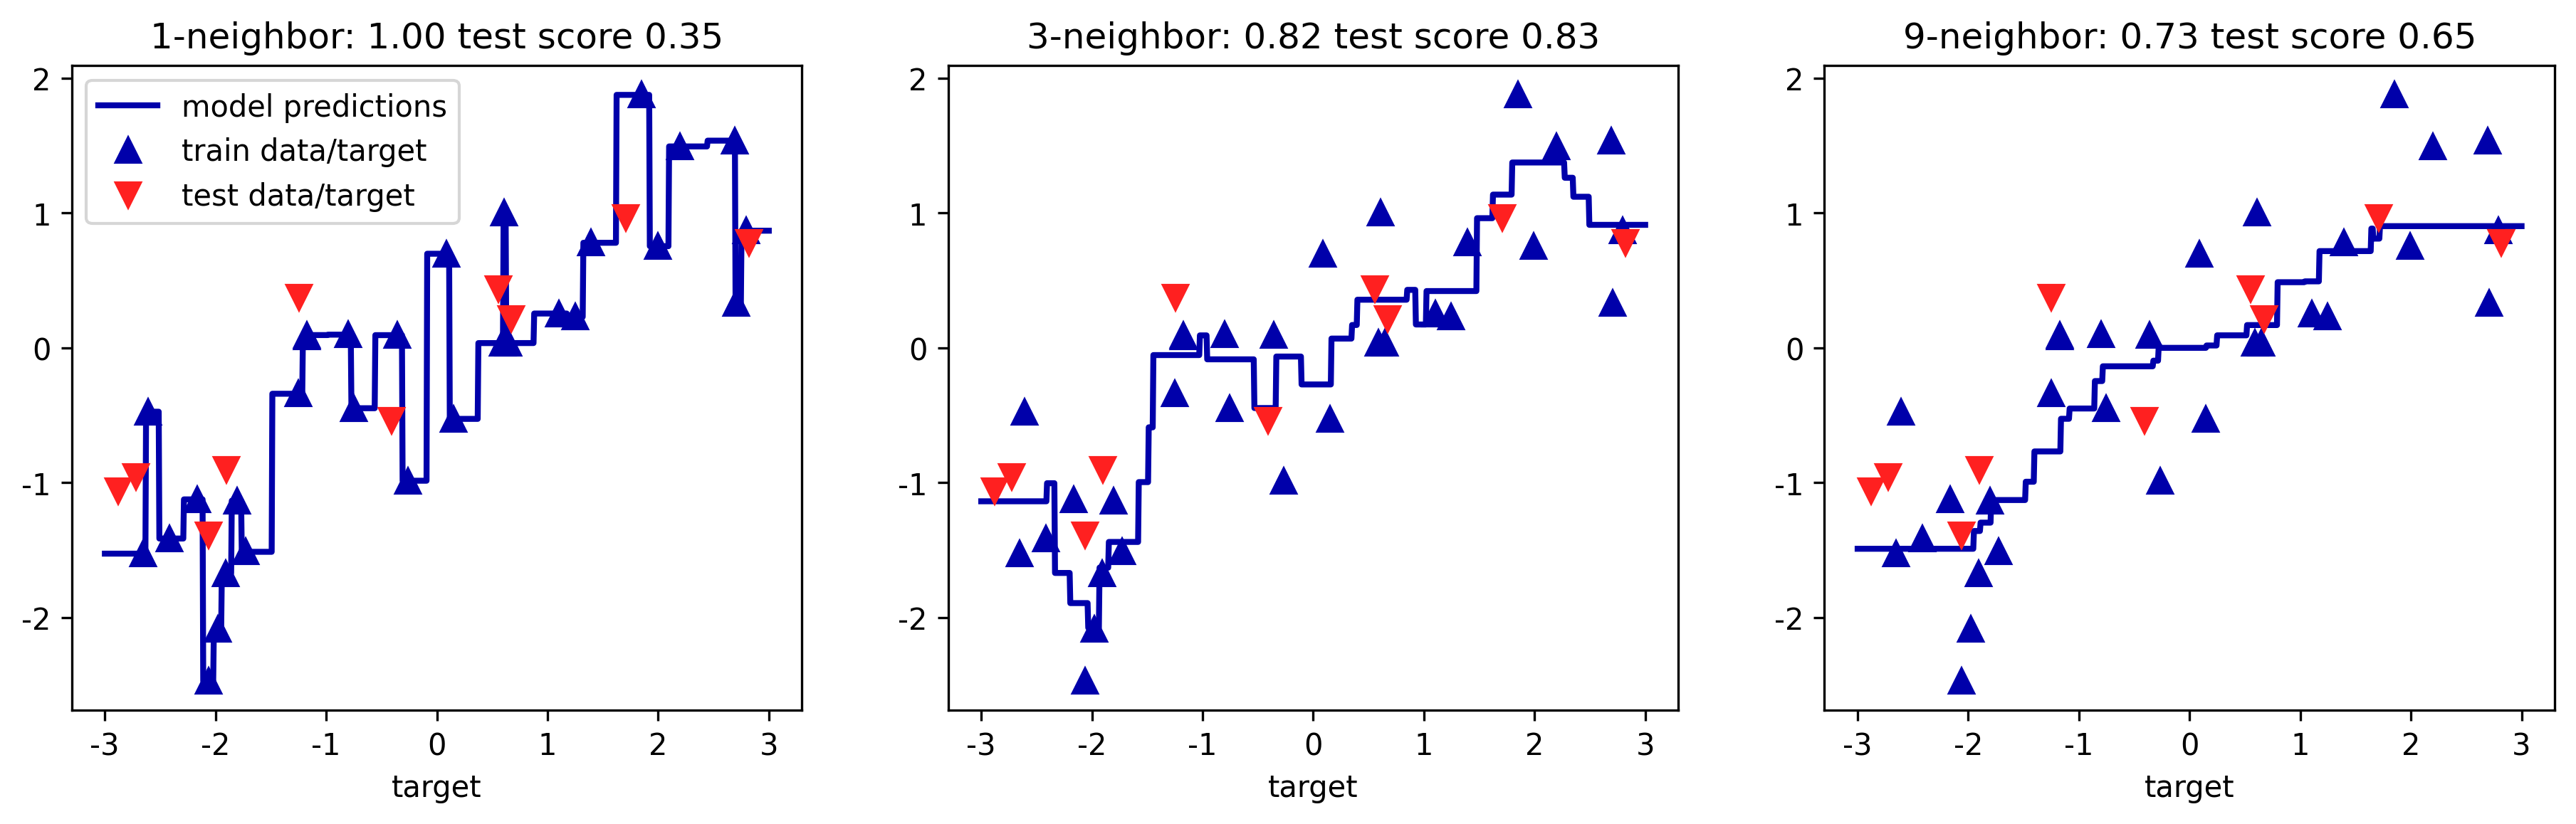

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3 과 3 사이에 1,000개의 테이터 포인트를 만든다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9], axes):

    
    #1, 3, 9 이웃을 사용한 예측을 한다.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', C= mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', C= mglearn.cm2(1), markersize = 8)


    
    ax.set_title("{}-neighbor: {:.2f} test score {:.2f}". format(
        n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("feature ")
    ax.set_xlabel("target")
axes[0].legend(["model predictions", "train data/target", "test data/target"], loc = 'best')